In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
from sklearn import metrics  
from sklearn.model_selection import train_test_split  
from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer

import lightgbm as lgb

In [4]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)


def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(app_train, col, title):
    df1 = app_train[app_train["TARGET"] == 1]
    df0 = app_train[app_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(app_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 

#     layout = go.Layout(barmode='group', height=350, width=800, margin=dict(l=200), title = title)
#     fig = go.Figure(data=[trace1, trace2], layout=layout)
#     iplot(fig, filename='grouped-bar')

In [5]:
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('expand_frame_repr', True)

In [6]:
def load_kaggle_csv(filepath, root="D:/wangh/Kaggle/HomeCredit/Data"):
    csv_path = os.path.join(root, filepath)
    
    if not os.path.isfile(csv_path) :
            csv_path = os.path.join("E:/SparkExerciseData/Kaggle", filepath)
        
    return pd.read_csv(csv_path)

In [7]:
PROJECT_ROOT_DIR = "D:/wangh/Kaggle/HomeCredit"
CHAPTER_ID = "end_to_end_project"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
                           
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def save_csv(file, df, **kwds):
    path = os.path.join(PROJECT_ROOT_DIR, file)
    df.to_csv(path, index=False, **kwds)

In [8]:
pd.set_option('display.max_columns', 500)
appl_data_train = load_kaggle_csv("application_train.csv")
appl_data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
appl_data_train.loc[appl_data_train['AMT_INCOME_TOTAL'] >10000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.460809,0.113161,0.145543,0.1031,0.0947,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0688,NaN,0.0615,NaN,NaN,0.105,0.0983,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0704,NaN,0.0641,NaN,NaN,0.1041,0.0947,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.07,NaN,0.0626,NaN,NaN,NaN,block of flats,0.0715,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,-15704,-4961,-3338.0,-4728,7.0,1,1,0,1,0,0,NaN,4.0,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.543417,0.788606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1133.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,-13551,-280,-3953.0,-4972,10.0,1,1,1,1,0,0,NaN,2.0,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.713507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
appl_data_train=appl_data_train[appl_data_train['AMT_INCOME_TOTAL'] <10000000]

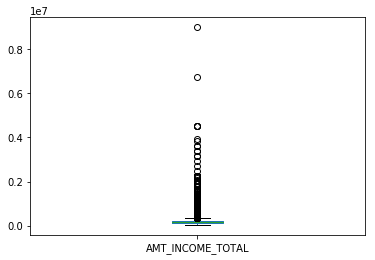

In [11]:
appl_data_train["AMT_INCOME_TOTAL"].plot.box()

In [12]:
appl_corr=appl_data_train.corr().sort_values('TARGET', axis=0)
appl_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
EXT_SOURCE_3,0.000210,-0.178898,-0.042705,-0.067128,0.043516,0.030752,0.047715,-0.006007,-0.205473,0.113432,-0.107553,-0.131601,-0.014604,NaN,-0.115290,-0.063622,0.012134,0.002604,-0.052174,-0.027957,-0.012904,-0.012158,-0.040513,-0.049163,-0.049145,-0.029605,-0.078480,-0.079734,-0.044314,0.186845,0.109153,1.000000,0.005713,0.009233,-0.000405,0.015680,-0.003188,0.007357,0.012277,0.003517,0.001865,0.010751,0.004059,0.005628,0.006777,-0.002336,0.004878,0.008081,-0.000611,0.015123,-0.002645,0.007062,0.010913,0.004373,0.003084,0.009399,0.004378,0.005431,0.006122,-0.002665,0.005536,0.009350,0.000169,0.015386,-0.003321,0.007388,0.012190,0.003802,0.001825,0.010726,0.003804,0.005480,0.006302,-0.002876,0.006228,-0.000423,-0.036255,-0.000722,-0.034098,-0.075248,NaN,-0.030691,0.003193,-0.005600,0.074969,0.000467,-0.016329,-0.006359,-0.003951,-0.010600,0.001161,0.000445,-0.001345,0.000839,0.002469,0.001200,-0.016153,-0.002590,-0.013837,-0.013058,-0.001193,-0.007190,-0.021259,-0.007858,-0.025134,-0.071453
EXT_SOURCE_2,0.002325,-0.160451,-0.018018,0.149559,0.131222,0.125779,0.139359,0.198916,-0.091994,-0.020767,-0.059920,-0.050949,-0.080747,NaN,0.019458,-0.018851,-0.003544,0.061179,0.023744,-0.001825,-0.292899,-0.288303,0.156857,0.015571,0.029517,0.030050,-0.043266,-0.075971,-0.058900,0.213983,1.000000,0.109153,0.090971,0.048341,0.009067,0.012912,0.053587,0.115051,0.032498,0.135860,0.112255,0.022271,0.080307,0.097575,0.019880,0.045083,0.080496,0.037685,0.008164,0.010088,0.044244,0.106173,0.023781,0.130113,0.106694,0.017316,0.071332,0.086022,0.016856,0.037313,0.089293,0.046953,0.009036,0.012618,0.052269,0.113460,0.031245,0.134608,0.111369,0.021228,0.078703,0.096077,0.018791,0.042640,0.094685,-0.019237,-0.030406,-0.018879,-0.032340,-0.195762,0.000899,-0.030694,0.003036,0.004250,-0.018707,-0.000587,0.050685,0.016641,-0.002061,-0.004368,0.002188,0.023794,0.021027,0.008418,0.013030,0.002594,0.001874,0.003256,0.000614,-0.007236,-0.004078,0.000552,0.001506,0.051979,-0.002852,-0.021988
EXT_SOURCE_1,0.000079,-0.155319,-0.138474,0.085724,0.168429,0.119398,0.175502,0.099

In [13]:
bar_hor(appl_data_train, "TARGET", "Distribution of Target Variable" , ["#44ff54", '#ff4444'], h=350, w=600, lm=200, xlb = ['Target : 1','Target : 0'])

In [14]:
appl_data_train["TARGET"].value_counts()

0    282684
1     24824
Name: TARGET, dtype: int64

In [15]:
tr0 = bar_hor(appl_data_train, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp(appl_data_train, 'CODE_GENDER', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Gender Distribution" , "Gender, Target=1" ,"Gender, Target=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

In [16]:
tr0 = bar_hor(appl_data_train, "NAME_FAMILY_STATUS", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp(appl_data_train,'NAME_FAMILY_STATUS', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Family Status Distribution" , "Family Status, Target = 1" ,"Family Status, Target = 0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

In [17]:
app_train = load_kaggle_csv("application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [18]:
bureau = load_kaggle_csv("bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [19]:
bureau_balance = load_kaggle_csv("bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [20]:
credit_card_balance = load_kaggle_csv("credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [21]:
pcb = load_kaggle_csv("POS_CASH_balance.csv")
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [22]:
previous_application = load_kaggle_csv("previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
installments_payments = load_kaggle_csv("installments_payments.csv")
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [24]:
app_test = load_kaggle_csv('application_test.csv')
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [25]:
app_test.shape

(48744, 121)

In [26]:
app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

In [27]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col,dummy_na=True)], axis=1)
        #df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)
pcb_cats = _get_categorical_features(pcb)
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
#data = _factorize_categoricals(data, data_cats)
data = _get_dummies(data, data_cats)

In [28]:
data_cats

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [29]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_test,is_train,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents

In [30]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_CURRENCY_nan,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_nan
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA,NAME_CONTRACT_STATUS_nan
0,1803195,182943,-31,48.0,45.0,Active,0,0,1,0,0,0,0,0,0,0,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0,1,0,0,0,0,0,0,0,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0,1,0,0,0,0,0,0,0,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0,1,0,0,0,0,0,0,0,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
## More Feature Ideas Reference : https://www.kaggle.com/ogrellier/good-fun-with-ligthgbm 

## count the number of previous applications for a given ID
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application['SK_ID_PREV'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])

## Average values for all other features in previous applications
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['p_' + col for col in prev_apps_avg.columns]
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

In [33]:
data.shape

(356255, 458)

In [34]:
## count the number of previous installments
cnt_inst = installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payments['SK_ID_PREV'] = installments_payments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

## Average values for all other variables in installments payments
avg_inst = installments_payments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['i_' + f_ for f_ in avg_inst.columns]
data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

In [35]:
data.shape

(356255, 465)

In [36]:
# Average Values for all bureau features 
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['buro_count'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['b_' + f_ for f_ in bureau_avg.columns]
data = data.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')

In [37]:
data.shape

(356255, 505)

In [38]:
### count the number of pos cash for a given ID
pcb_count = pcb[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pcb['SK_ID_PREV'] = pcb['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])

## Average Values for all other variables in pos cash
pcb_avg = pcb.groupby('SK_ID_CURR').mean()
data = data.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')

In [39]:
data.shape

(356255, 521)

In [40]:
### count the number of previous applications for a given ID
nb_prevs = credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance['SK_ID_PREV'] = credit_card_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

### average of all other columns 
avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

In [41]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_test,is_train,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents

In [42]:
data.shape

(356255, 550)

In [43]:
#### prepare final Train X and Test X dataframes 
ignore_features = data_cats + ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]

trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=50)
for train_index, test_index in split.split(trainX, Y):
    strat_trainX = trainX.loc[train_index]
    strat_Y = Y.loc[train_index]
    strat_trainX_val = trainX.loc[test_index]
    strat_Y_val = Y.loc[test_index]

In [45]:
strat_Y.head()

213486    1
158886    0
305761    0
151836    0
229642    0
Name: TARGET, dtype: int64

In [46]:
 strat_trainX.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_TH

In [47]:
strat_trainX.dtypes

CNT_CHILDREN                                                       int64
AMT_INCOME_TOTAL                                                 float64
AMT_CREDIT                                                       float64
AMT_ANNUITY                                                      float64
AMT_GOODS_PRICE                                                  float64
REGION_POPULATION_RELATIVE                                       float64
DAYS_BIRTH                                                         int64
DAYS_EMPLOYED                                                      int64
DAYS_REGISTRATION                                                float64
DAYS_ID_PUBLISH                                                    int64
OWN_CAR_AGE                                                      float64
FLAG_MOBIL                                                         int64
FLAG_EMP_PHONE                                                     int64
FLAG_WORK_PHONE                                    

In [48]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
ignore_features_imputer =  data_cats + ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features_imputer = [col for col in data.columns if col not in ignore_features_imputer]
imp.fit(data[relevant_features_imputer])
strat_trainX_imp = imp.transform(strat_trainX[relevant_features_imputer])
strat_trainX_val_imp = imp.transform(strat_trainX_val[relevant_features_imputer])
testX_imp=imp.transform(testX[relevant_features_imputer])

# Final models for submission

In [49]:
def print_AUC(alg, input_train, input_Y, input_test, input_test_Y) :
    predictions_train = alg.predict(input_train)
    predictions_prob_train = alg.predict_proba(input_train)[:,1]
    print("Train Accuracy Score:", metrics.accuracy_score(input_Y, predictions_train))
    print("Train AUC Score:", metrics.roc_auc_score(input_Y, predictions_prob_train))

    predictions = alg.predict(input_test)
    predictions_prob = alg.predict_proba(input_test)[:,1]

    print("Accuracy Score:", metrics.accuracy_score(input_test_Y, predictions))
    print("AUC Score:", metrics.roc_auc_score(input_test_Y, predictions_prob))

In [50]:
lgb_clf = lgb.LGBMClassifier(
    boosting_type='gbdt', num_leaves=16,
    max_depth=5,
    min_child_samples=200,
    learning_rate=0.05, n_estimators=2000,  
    objective='binary', min_split_gain=0.01, min_child_weight=5, 
    subsample=0.9, subsample_freq=0, colsample_bytree=0.8,
    reg_alpha=0.1, reg_lambda=0.1, random_state=27, n_jobs=8, silent=False, seed=27
)

In [51]:
lgb_clf.fit(strat_trainX, strat_Y, eval_metric='auc', verbose = 10)

print_AUC(lgb_clf, strat_trainX, strat_Y, strat_trainX_val,  strat_Y_val)

Train Accuracy Score: 0.9284669023539304
Train AUC Score: 0.9084715365041274
Accuracy Score: 0.9195807227870878
AUC Score: 0.7778073690548363


In [53]:
xgb_clf = XGBClassifier(
        learning_rate =0.05,
        n_estimators=2000,
        max_depth=5,
        min_child_weight=5,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        objective= 'binary:logistic',
        nthread=8,
        silent=False,
        scale_pos_weight=1,
        seed=27)

In [54]:
xgb_clf.fit(strat_trainX, strat_Y, verbose = 10)

print_AUC(xgb_clf, strat_trainX, strat_Y, strat_trainX_val,  strat_Y_val)

Train Accuracy Score: 0.9352820117348101
Train AUC Score: 0.9433299616901345
Accuracy Score: 0.9193964489344636
AUC Score: 0.7757866350515347


In [55]:
log_clf = LogisticRegression(penalty='l1',  C=0.5)
  

In [57]:
log_clf.fit(strat_trainX_imp, strat_Y)

print_AUC(log_clf, strat_trainX_imp, strat_Y, strat_trainX_val_imp,  strat_Y_val)

Train Accuracy Score: 0.9196495352067529
Train AUC Score: 0.7717788319668953
Accuracy Score: 0.9190387408676046
AUC Score: 0.7647600492390632


In [58]:
rnd_clf = RandomForestClassifier(n_estimators=5000, 
                        max_leaf_nodes=30, 
                        max_features=0.1,
                        max_depth=5,
                        bootstrap=True, n_jobs=-1, random_state=27)

In [60]:
rnd_clf.fit(strat_trainX_imp, strat_Y)

print_AUC(rnd_clf, strat_trainX_imp, strat_Y, strat_trainX_val_imp,  strat_Y_val)

Train Accuracy Score: 0.9192732408237595
Train AUC Score: 0.7488234702591092
Accuracy Score: 0.9192663732737876
AUC Score: 0.7361419889960261


In [72]:
strat_trainX_val_imp_df = pd.DataFrame(strat_trainX_val_imp)
split_l2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=27)
for train_index, test_index in split_l2.split(strat_trainX_val, strat_Y_val):
    strat_trainX_val_l2train = strat_trainX_val.iloc[train_index]
    strat_trainX_val_l2train_imp= strat_trainX_val_imp_df.iloc[train_index]
    strat_Y_val_l2train = strat_Y_val.iloc[train_index]
    strat_trainX_val_l2test = strat_trainX_val.iloc[test_index]
    strat_trainX_val_l2test_imp = strat_trainX_val_imp_df.iloc[test_index]
    strat_Y_val_l2test = strat_Y_val.iloc[test_index]
    
seclvl_train = np.concatenate(( np.array([log_clf.predict_proba(strat_trainX_val_l2train_imp)[:,1]]).T,
                                np.array([rnd_clf.predict_proba(strat_trainX_val_l2train_imp)[:,1]]).T,
                                np.array([xgb_clf.predict_proba(strat_trainX_val_l2train)[:,1]]).T,
                                np.array([lgb_clf.predict_proba(strat_trainX_val_l2train)[:,1]]).T
                            ), axis=1)
seclvl_val = np.concatenate((  np.array([log_clf.predict_proba(strat_trainX_val_l2test_imp)[:,1]]).T,
                                np.array([rnd_clf.predict_proba(strat_trainX_val_l2test_imp)[:,1]]).T,
                                np.array([xgb_clf.predict_proba(strat_trainX_val_l2test)[:,1]]).T,
                                np.array([lgb_clf.predict_proba(strat_trainX_val_l2test)[:,1]]).T,
                             ), axis=1) 

In [73]:
gbm_level2_1 = xgb.XGBClassifier(
 learning_rate = 0.01,
 n_estimators= 1000,
 max_depth=2,
 min_child_weight=1,
 gamma=0.1,  
 subsample=0.6, 
 colsample_bytree=1,
 reg_alpha = 0.2,
 objective= 'binary:logistic',
 nthread= -1,
 silent=False,
 scale_pos_weight=1)

gbm_level2_1.fit(seclvl_train, strat_Y_val_l2train, verbose = 10)

print_AUC(gbm_level2_1, seclvl_train, strat_Y_val_l2train, seclvl_val,  strat_Y_val_l2test)

Train Accuracy Score: 0.9464088278015046
Train AUC Score: 0.934067801502503
Accuracy Score: 0.9459535629891387
AUC Score: 0.9313593167579063


In [64]:
seclvl_train_all = np.concatenate(( np.array([log_clf.predict_proba(strat_trainX_val_imp)[:,1]]).T,
                                np.array([rnd_clf.predict_proba(strat_trainX_val_imp)[:,1]]).T,
                                np.array([xgb_clf.predict_proba(strat_trainX_val)[:,1]]).T,
                                np.array([lgb_clf.predict_proba(strat_trainX_val)[:,1]]).T
                            ), axis=1)

gbm_level2 = xgb.XGBClassifier(
 learning_rate = 0.01,
 n_estimators= 1000,
 max_depth=2,
 min_child_weight=1,
 gamma=0.1,  
 subsample=0.6, 
 colsample_bytree=1,
 reg_alpha = 0.2,
 objective= 'binary:logistic',
 nthread= -1,
 silent=False,
 scale_pos_weight=1)

gbm_level2.fit(seclvl_train_all, strat_Y_val, verbose = 10)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.6)

# Generate the final result

In [65]:
lgb_test_pred_prob = lgb_clf.predict_proba(testX)[:,1]
log_test_pred_prob = log_clf.predict_proba(testX_imp)[:,1]
rnd_test_pred_prob = rnd_clf.predict_proba(testX_imp)[:,1]
xgb_test_pred_prob = xgb_clf.predict_proba(testX)[:,1]

In [ ]:
seclvl_test = np.concatenate(( np.array([log_test_pred_prob]).T,
                               np.array([rnd_test_pred_prob]).T,
                               np.array([xgb_test_pred_prob]).T,
                               np.array([lgb_test_pred_prob]).T,
                             ), axis=1) 

In [80]:
test_prob = xgb_test_pred_prob
#log_test_pred_prob  -> 0.763
#gbm_level2.predict_proba(seclvl_test)[:,1] -> 0.741
test_prob

array([0.02285285, 0.16143215, 0.01170964, ..., 0.0075595 , 0.05783738,
       0.26785544], dtype=float32)

In [81]:
resultset=data[data['is_test'] == 1]['SK_ID_CURR'].values
resultset=pd.DataFrame(resultset)
resultset.columns=['SK_ID_CURR']
resultset.head()

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038


In [82]:
type(resultset)

pandas.core.frame.DataFrame

In [83]:
test_prob_df=pd.DataFrame(test_prob)

test_prob_df.head()

,0
0,0.022853
1,0.161432
2,0.011710
3,0.038012
4,0.150433


In [84]:
resultset['TARGET']=test_prob_df[0]
resultset.head()

,SK_ID_CURR,TARGET
0,100001,0.022853
1,100005,0.161432
2,100013,0.011710
3,100028,0.038012
4,100038,0.150433


In [85]:
save_csv("result_submission5.csv", resultset, float_format='%.6f')

# Tune Models

In [43]:
log_clf = LogisticRegression(penalty='l1', 
                             C=1, random_state=27)


log_clf.fit(strat_trainX_imp, strat_Y)

log_y_pred = log_clf.predict(strat_trainX_val_imp)
log_y_pred_prob = log_clf.predict_proba(strat_trainX_val_mean)[:,1]

print(log_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, log_y_pred))
print(log_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, log_y_pred_prob))

NameError: name 'clf' is not defined

In [44]:
print(log_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, log_y_pred))
print(log_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, log_y_pred_prob))

LogisticRegression Accuracy Score: 0.918979561973
LogisticRegression AUC Score: 0.759659311028


In [ ]:
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=232,
       n_jobs=1, nthread=4, objective=u'binary:logistic', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=False, subsample=0.8)
xgb_clf.fit(strat_trainX, strat_Y)

xgb_y_pred = xgb_clf.predict(strat_trainX_val)
xgb_y_pred_prob = xgb_clf.predict_proba(strat_trainX_val)[:,1]

print(xgb_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, xgb_y_pred))
print(xgb_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, xgb_y_pred_prob))

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=15, max_features=8, bootstrap=True, n_jobs=-1, random_state=27)

rnd_y_pred = rnd_clf.predict(strat_trainX_val) rnd_y_pred_prob = rnd_clf.predict_proba(strat_trainX_val)[:,1]

print(rnd_clf.class.name, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, rnd_y_pred)) 
print(rnd_clf.class.name, "AUC Score:", metrics.roc_auc_score(strat_Y_val, rnd_y_pred_prob))

In [30]:
import lightgbm as lgb
lgb_train = lgb.Dataset(data=strat_trainX, label=strat_Y)
lgb_eval = lgb.Dataset(data=strat_trainX_val, label=strat_Y_val)
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 10 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
lgb_clf = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.741605
[400]	valid_0's auc: 0.755352
[600]	valid_0's auc: 0.765173
[800]	valid_0's auc: 0.769797
[1000]	valid_0's auc: 0.772184
[1200]	valid_0's auc: 0.773289
[1400]	valid_0's auc: 0.773774
[1600]	valid_0's auc: 0.774068
[1800]	valid_0's auc: 0.774624
[2000]	valid_0's auc: 0.774773
[2200]	valid_0's auc: 0.774923
[2400]	valid_0's auc: 0.775035
[2600]	valid_0's auc: 0.775078
Early stopping, best iteration is:
[2530]	valid_0's auc: 0.775139


In [92]:
#native CV to get n_estimator
import lightgbm as lgb
lgb_train = lgb.Dataset(data=strat_trainX, label=strat_Y)
lgb_eval = lgb.Dataset(data=strat_trainX_val, label=strat_Y_val)
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 10 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
lgb_result=lgb.cv(params, lgb_train, stratified=True, metrics={'auc'}, num_boost_round=5000,
                      nfold=5, early_stopping_rounds=150, verbose_eval=20)
lgb_result

[20]	cv_agg's auc: 0.733168 + 0.00169767
[40]	cv_agg's auc: 0.734613 + 0.00136115
[60]	cv_agg's auc: 0.736723 + 0.00139798
[80]	cv_agg's auc: 0.737711 + 0.00130111
[100]	cv_agg's auc: 0.740679 + 0.00106932
[120]	cv_agg's auc: 0.742371 + 0.00101715
[140]	cv_agg's auc: 0.743258 + 0.0011977
[160]	cv_agg's auc: 0.744853 + 0.00135925
[180]	cv_agg's auc: 0.74562 + 0.00153187
[200]	cv_agg's auc: 0.747432 + 0.00166469
[220]	cv_agg's auc: 0.748675 + 0.001804
[240]	cv_agg's auc: 0.74996 + 0.00183867
[260]	cv_agg's auc: 0.751535 + 0.00193554
[280]	cv_agg's auc: 0.752776 + 0.00207062
[300]	cv_agg's auc: 0.754122 + 0.00214147
[320]	cv_agg's auc: 0.755703 + 0.0021587
[340]	cv_agg's auc: 0.757258 + 0.00206352
[360]	cv_agg's auc: 0.758809 + 0.00195374
[380]	cv_agg's auc: 0.760369 + 0.0018536
[400]	cv_agg's auc: 0.761788 + 0.00178609
[420]	cv_agg's auc: 0.763144 + 0.00180164
[440]	cv_agg's auc: 0.764365 + 0.00179149
[460]	cv_agg's auc: 0.76552 + 0.00176807
[480]	cv_agg's auc: 0.766528 + 0.00177547
[500

{'auc-mean': [0.6863425768086623,
  0.7267583469771421,
  0.7245368716334131,
  0.7306779762044887,
  0.7300481355610607,
  0.7313980718429554,
  0.7342816836417613,
  0.734307445566463,
  0.733779755116632,
  0.7331481034181839,
  0.7331831813090555,
  0.7327836434383803,
  0.7324332224834313,
  0.7320417598460462,
  0.7317622696816103,
  0.7344157503999431,
  0.7340956204242758,
  0.7336191962199534,
  0.7334059944433605,
  0.7331680745932716,
  0.7328688449515758,
  0.7326979502634208,
  0.7333733277224008,
  0.7331191988278808,
  0.7328904055547186,
  0.734544436535677,
  0.734416058940945,
  0.7341308542209632,
  0.7346053400909858,
  0.7344863288541814,
  0.7344491495761305,
  0.7343054746718758,
  0.7342552916661242,
  0.734097157199686,
  0.7339519826299046,
  0.7345855634172394,
  0.735065358346611,
  0.7349399086114572,
  0.7347916952279372,
  0.7346132566800003,
  0.7344285360685625,
  0.7344311038438096,
  0.734318842328336,
  0.7342294882009703,
  0.7341774009279765,
  0.7

In [93]:
len(lgb_result['auc-mean'])

2023

In [98]:
#grid search
lgb_param_test1 = {
    'max_depth':range(2,10,2),
    'num_leaves':range(30,60,10),
    #'min_child_samples':range(200,1000,300)
    #'min_child_weigh':range(20,100,20)
    
}
lgb_gsearch1 = GridSearchCV(estimator = lgb.LGBMClassifier(
    boosting_type='gbdt', num_leaves=48, max_depth=7,
    learning_rate=0.01, n_estimators=len(lgb_result['auc-mean']),  
    objective='binary', min_split_gain=0.02, min_child_weight=1, 
    min_child_samples=300, subsample=0.85, subsample_freq=0, colsample_bytree=0.95,
    reg_alpha=0.1, reg_lambda=0.1, random_state=27, n_jobs=-1, silent=False
), param_grid = lgb_param_test1, scoring='roc_auc',n_jobs=4,verbose=10,iid=False, cv=5)
 

In [99]:
lgb_gsearch1.fit(strat_trainX, strat_Y, eval_metric='auc', verbose = 50)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 14.0min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 22.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 41.0min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 61.2min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 93.2min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 129.3min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 186.4min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 217.9min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 217.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.95,
        learning_rate=0.01, max_depth=7, min_child_samples=300,
        min_child_weight=1, min_split_gain=0.02, n_estimators=2023,
        n_jobs=-1, num_leaves=48, objective='binary', random_state=27,
        reg_alpha=0.1, reg_lambda=0.1, silent=False, subsample=0.85,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(2, 10, 2), 'num_leaves': range(30, 60, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [100]:
lgb_gsearch1.grid_scores_, lgb_gsearch1.best_params_, lgb_gsearch1.best_score_ 

([mean: 0.77056, std: 0.00290, params: {'max_depth': 2, 'num_leaves': 30},
  mean: 0.77056, std: 0.00290, params: {'max_depth': 2, 'num_leaves': 40},
  mean: 0.77056, std: 0.00290, params: {'max_depth': 2, 'num_leaves': 50},
  mean: 0.77931, std: 0.00329, params: {'max_depth': 4, 'num_leaves': 30},
  mean: 0.77931, std: 0.00329, params: {'max_depth': 4, 'num_leaves': 40},
  mean: 0.77931, std: 0.00329, params: {'max_depth': 4, 'num_leaves': 50},
  mean: 0.78107, std: 0.00378, params: {'max_depth': 6, 'num_leaves': 30},
  mean: 0.78093, std: 0.00392, params: {'max_depth': 6, 'num_leaves': 40},
  mean: 0.78108, std: 0.00390, params: {'max_depth': 6, 'num_leaves': 50},
  mean: 0.78131, std: 0.00339, params: {'max_depth': 8, 'num_leaves': 30},
  mean: 0.78115, std: 0.00346, params: {'max_depth': 8, 'num_leaves': 40},
  mean: 0.78102, std: 0.00348, params: {'max_depth': 8, 'num_leaves': 50}],
 {'max_depth': 8, 'num_leaves': 30},
 0.7813124802154603)

In [ ]:
#fit the model with best parameter and n_estimator=5000
lgb_clf = lgb.LGBMClassifier(
    boosting_type='gbdt', num_leaves=lgb_gsearch1.best_params_["num_leaves"],
    max_depth=lgb_gsearch1.best_params_["max_depth"],
    min_child_samples=lgb_gsearch1.best_params_["min_child_samples"],
    learning_rate=0.01, n_estimators=5000,  
    objective='binary', min_split_gain=0.01, min_child_weight=1, 
    subsample=0.9, subsample_freq=0, colsample_bytree=0.8,
    reg_alpha=0.1, reg_lambda=0.1, random_state=27, n_jobs=-1, silent=False
)

lgb_clf.fit(strat_trainX, strat_Y, eval_metric='auc', verbose = 100)

print_AUC(lgb_clf, strat_trainX, strat_Y, strat_trainX_val,  strat_Y_val)

In [ ]:
def modelfit(alg, dtrain, dtrain_target, dtest, dtest_target, useTrainCV=True, cv_folds=5, early_stopping_rounds=150):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, label=dtrain_target.values)
        #xgtest = xgb.DMatrix(dtest.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics={'auc'}, early_stopping_rounds=early_stopping_rounds)
        print("n_estimators use : %d" % cvresult.shape[0])
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, dtrain_target,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print("\ndtrain Model Report")
    print("dtrain Accuracy : %.4g" % metrics.accuracy_score(dtrain_target, dtrain_predictions))
    print("dtrain AUC Score: %f" % metrics.roc_auc_score(dtrain_target, dtrain_predprob)) 
    
#     Predict on validation data:
    dtest_predictions = alg.predict(dtest)
    dtest_predprob = alg.predict_proba(dtest)[:,1]
        
    #Print model report:
    print("\ndtest Model Report")
    print("dtest Accuracy : %.4g" % metrics.accuracy_score(dtest_target, dtest_predictions))
    print("dtest AUC Score: %f" % metrics.roc_auc_score(dtest_target, dtest_predprob))

In [32]:
xgb1 = xgb.XGBClassifier(
        learning_rate=0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        silent=False,    
        seed=27)
modelfit(xgb1, strat_trainX, strat_Y, strat_trainX_val, strat_Y_val)

n_estimators use : 226

dtrain Model Report
dtrain Accuracy : 0.923
dtrain AUC Score: 0.838106

dtest Model Report
dtest Accuracy : 0.9195
dtest AUC Score: 0.774648


In [33]:
xgb1.get_params()['n_estimators']

226

In [34]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=xgb1.get_params()['n_estimators'], 
                                        max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
                                                         random_state=27, silent=False,  seed=27, verbose=10), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,verbose=10,iid=False, cv=5)
gsearch1.fit(strat_trainX, strat_Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 40.6min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 49.7min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 74.6min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 97.9min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 142.3min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 186.0min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 263.2min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 302.2min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 302.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=226,
       n_jobs=1, nthread=4, objective=u'binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=False, subsample=0.8, verbose=10),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={u'max_depth': [3, 5, 7, 9], u'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'roc_auc', verbose=10)

In [35]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77344, std: 0.00582, params: {u'max_depth': 3, u'min_child_weight': 1},
  mean: 0.77356, std: 0.00563, params: {u'max_depth': 3, u'min_child_weight': 3},
  mean: 0.77376, std: 0.00575, params: {u'max_depth': 3, u'min_child_weight': 5},
  mean: 0.77431, std: 0.00600, params: {u'max_depth': 5, u'min_child_weight': 1},
  mean: 0.77512, std: 0.00559, params: {u'max_depth': 5, u'min_child_weight': 3},
  mean: 0.77580, std: 0.00564, params: {u'max_depth': 5, u'min_child_weight': 5},
  mean: 0.77087, std: 0.00607, params: {u'max_depth': 7, u'min_child_weight': 1},
  mean: 0.77214, std: 0.00619, params: {u'max_depth': 7, u'min_child_weight': 3},
  mean: 0.77148, std: 0.00540, params: {u'max_depth': 7, u'min_child_weight': 5},
  mean: 0.76444, std: 0.00579, params: {u'max_depth': 9, u'min_child_weight': 1},
  mean: 0.76487, std: 0.00691, params: {u'max_depth': 9, u'min_child_weight': 3},
  mean: 0.76713, std: 0.00651, params: {u'max_depth': 9, u'min_child_weight': 5}],
 {u'max_depth':

In [38]:
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=xgb1.get_params()['n_estimators'],
                                                  max_depth=gsearch1.best_params_['max_depth'],
                                        min_child_weight=gsearch1.best_params_['min_child_weight'],
                                                  gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,
                                                  random_state=27, silent=False, seed=27), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False,verbose=10, cv=5)
gsearch3.fit(strat_trainX, strat_Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 30.9min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 46.5min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 73.5min
[Parallel(n_jobs=4)]: Done  21 out of  25 | elapsed: 199.9min remaining: 38.1min
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 207.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=226,
       n_jobs=1, nthread=4, objective=u'binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=False, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={u'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'roc_auc', verbose=10)

In [ ]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.77580, std: 0.00564, params: {u'gamma': 0.0},
  mean: 0.77611, std: 0.00543, params: {u'gamma': 0.1},
  mean: 0.77583, std: 0.00540, params: {u'gamma': 0.2},
  mean: 0.77595, std: 0.00546, params: {u'gamma': 0.3},
  mean: 0.77586, std: 0.00540, params: {u'gamma': 0.4}],
 {u'gamma': 0.1},
 0.77611463544021908)

In [ ]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, 
                                                  max_depth=gsearch1.best_params_['max_depth'],
                                        min_child_weight=gsearch1.best_params_['min_child_weight'],
                                                  gamma=gsearch3.best_params_['gamma'], 
                                        subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=2, verbose=10,silent=False,
                                                  scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, verbose=10,cv=5)
gsearch4.fit(strat_trainX, strat_Y)

In [ ]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=232,
                                                  max_depth=gsearch1.best_params_['max_depth'],
                                        min_child_weight=gsearch1.best_params_['min_child_weight'],
                                                  gamma=gsearch3.best_params_['gamma'],  
                                                  subsample=gsearch4.best_params_["subsample"], 
                                        colsample_bytree=gsearch4.best_params_["colsample_bytree"],
                                                  silent=False,
                                        objective= 'binary:logistic', nthread=2, verbose=10,
                                                  scale_pos_weight=1,seed=27), 
                       param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(strat_trainX, strat_Y)

In [ ]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

In [ ]:
xgb3 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth==gsearch1.best_params_['max_depth'],
        min_child_weight=gsearch1.best_params_['min_child_weight'],
        gamma=gsearch3.best_params_['gamma'], 
        subsample=gsearch4.best_params_["subsample"],
        colsample_bytree=gsearch4.best_params_["colsample_bytree"],
        reg_alpha=gsearch6.best_params_["reg_alpha"],
        objective= 'binary:logistic',
        nthread=8,
        scale_pos_weight=1,
        silent=False,
        seed=27)
modelfit(xgb3, strat_trainX, strat_Y, strat_trainX_val, strat_Y_val)

In [ ]:
xgb3

In [ ]:
xgb4 = XGBClassifier(
        learning_rate =0.01,
        n_estimators=5000,
        max_depth=gsearch1.best_params_['max_depth'],
        min_child_weight=gsearch1.best_params_['min_child_weight'],
        gamma=gsearch3.best_params_['gamma'],
        subsample=gsearch4.best_params_["subsample"],
        colsample_bytree=gsearch4.best_params_["colsample_bytree"],
        reg_alpha=gsearch6.best_params_["reg_alpha"],
        objective= 'binary:logistic',
        nthread=8,
        silent=False,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb4, strat_trainX, strat_Y, strat_trainX_val, strat_Y_val)

In [ ]:
xgb4

In [ ]:
xgb_clf = xgb4

In [ ]:
xgb_clf = xgb4

xgb_clf.fit(strat_trainX, strat_Y)

xgb_y_pred = xgb_clf.predict(strat_trainX_val)
xgb_y_pred_prob = xgb_clf.predict_proba(strat_trainX_val)[:,1]

print(xgb_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, xgb_y_pred))
print(xgb_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, xgb_y_pred_prob))

In [86]:
log_param_grid = {'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1,10] }
log_grid_search = GridSearchCV(LogisticRegression(), log_param_grid, cv=5,
                           scoring='roc_auc', return_train_score=True, verbose=10,n_jobs=8,iid=False)

log_grid_search.fit(strat_trainX_imp, strat_Y)
log_grid_search.grid_scores_, log_grid_search.best_params_, log_grid_search.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  9.5min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed: 15.0min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 23.0min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 35.2min
[Parallel(n_jobs=8)]: Done  41 out of  50 | elapsed: 43.4min remaining:  9.5min
[Parallel(n_jobs=8)]: Done  47 out of  50 | elapsed: 51.5min remaining:  3.3min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 53.2min finished


([mean: 0.69524, std: 0.00356, params: {'C': 0.001, 'penalty': 'l1'},
  mean: 0.64235, std: 0.01781, params: {'C': 0.001, 'penalty': 'l2'},
  mean: 0.76069, std: 0.00217, params: {'C': 0.01, 'penalty': 'l1'},
  mean: 0.63698, std: 0.01198, params: {'C': 0.01, 'penalty': 'l2'},
  mean: 0.76652, std: 0.00208, params: {'C': 0.1, 'penalty': 'l1'},
  mean: 0.64328, std: 0.01896, params: {'C': 0.1, 'penalty': 'l2'},
  mean: 0.76692, std: 0.00251, params: {'C': 1, 'penalty': 'l1'},
  mean: 0.63975, std: 0.01189, params: {'C': 1, 'penalty': 'l2'},
  mean: 0.76687, std: 0.00281, params: {'C': 10, 'penalty': 'l1'},
  mean: 0.63997, std: 0.00966, params: {'C': 10, 'penalty': 'l2'}],
 {'C': 1, 'penalty': 'l1'},
 0.7669226491164064)

In [90]:
log_param_grid = {'penalty': ['l1'],'C': [0.8, 0.9,1.1, 1.2, 1.3] }
log_grid_search = GridSearchCV(LogisticRegression(), log_param_grid, cv=5,
                           scoring='roc_auc', return_train_score=True, verbose=10,n_jobs=8,iid=False)

log_grid_search.fit(strat_trainX_imp, strat_Y)
log_grid_search.grid_scores_, log_grid_search.best_params_, log_grid_search.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed: 13.2min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed: 29.3min
[Parallel(n_jobs=8)]: Done  13 out of  25 | elapsed: 35.8min remaining: 33.1min
[Parallel(n_jobs=8)]: Done  16 out of  25 | elapsed: 39.8min remaining: 22.4min
[Parallel(n_jobs=8)]: Done  19 out of  25 | elapsed: 52.9min remaining: 16.7min
[Parallel(n_jobs=8)]: Done  22 out of  25 | elapsed: 54.6min remaining:  7.4min
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed: 55.8min remaining:    0.0s
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed: 55.8min finished


([mean: 0.76689, std: 0.00247, params: {'C': 0.8, 'penalty': 'l1'},
  mean: 0.76690, std: 0.00248, params: {'C': 0.9, 'penalty': 'l1'},
  mean: 0.76693, std: 0.00250, params: {'C': 1.1, 'penalty': 'l1'},
  mean: 0.76697, std: 0.00251, params: {'C': 1.2, 'penalty': 'l1'},
  mean: 0.76696, std: 0.00258, params: {'C': 1.3, 'penalty': 'l1'}],
 {'C': 1.2, 'penalty': 'l1'},
 0.7669663718985419)

In [ ]:
log_clf = LogisticRegression(penalty=log_grid_search.best_params_['penalty'], 
                             C=log_grid_search.best_params_['C'], random_state=27)


log_clf.fit(strat_trainX_imp, strat_Y)

log_clf

In [ ]:
print_AUC(log_clf, strat_trainX_imp, strat_Y, strat_trainX_val_imp,  strat_Y_val)

In [ ]:
rnd_clf = RandomForestClassifier(random_state=27)

rnd_param_grid = [
   # {'n_estimators': range(600,1000,100), 'max_features': range(18,30, 2), 'max_leaf_nodes':range(28, 40, 2)}
    {'n_estimators': 1000, 'max_features': [0.1, 0.3, 0.5]], 
     'max_leaf_nodes':range(28, 40, 5), max_depth: range(2, 10, 2)}
  ]

rnd_grid_search = GridSearchCV(rnd_clf, rnd_param_grid, cv=5,
                           scoring='roc_auc', return_train_score=True, verbose=10,n_jobs=8,iid=False)
rnd_grid_search.fit(strat_trainX, strat_Y)
rnd_grid_search.grid_scores_, rnd_grid_search.best_params_, rnd_grid_search.best_score_

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=rnd_grid_search.best_params_["n_estimators"], 
                        max_leaf_nodes=rnd_grid_search.best_params_["max_leaf_nodes"], 
                        max_features=rnd_grid_search.best_params_["max_features"], 
                        bootstrap=True, n_jobs=-1, random_state=27)

rnd_clf.fit(strat_trainX_imp, strat_Y)

rnd_y_pred = rnd_clf.predict(strat_trainX_val_imp)
rnd_y_pred_prob = rnd_clf.predict_proba(strat_trainX_val_imp)[:,1]

print(rnd_clf.__class__.__name__, "Accuracy Score:", metrics.accuracy_score(strat_Y_val, rnd_y_pred))
print(rnd_clf.__class__.__name__, "AUC Score:", metrics.roc_auc_score(strat_Y_val, rnd_y_pred_prob))

In [59]:
strat_trainX_val_imp_df = pd.DataFrame(strat_trainX_val_imp)
split_l2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=27)
for train_index, test_index in split_l2.split(strat_trainX_val, strat_Y_val):
    strat_trainX_val_l2train = strat_trainX_val.iloc[train_index]
    strat_trainX_val_l2train_imp= strat_trainX_val_imp_df.iloc[train_index]
    strat_Y_val_l2train = strat_Y_val.iloc[train_index]
    strat_trainX_val_l2test = strat_trainX_val.iloc[test_index]
    strat_trainX_val_l2test_imp = strat_trainX_val_imp_df.iloc[test_index]
    strat_Y_val_l2test = strat_Y_val.iloc[test_index]
 

In [58]:
train_index

array([ 5470, 20477, 29897, ..., 44349, 34418, 13544], dtype=int64)

In [60]:
strat_Y_val_l2train.head()

111684    0
118868    0
181681    0
241875    0
284374    0
179229    0
273319    0
231048    0
41337     1
210606    0
8854      0
292803    0
285120    0
271777    0
66273     0
9648      0
198638    0
209377    0
233115    0
161968    0
179762    0
2969      0
160120    0
103018    0
216354    0
34428     0
42321     0
55222     0
12832     0
176581    0
103748    0
266212    0
255469    0
198505    0
278148    0
161970    0
90426     0
295175    0
108334    0
34757     0
85700     1
265879    0
301288    0
212412    0
260094    0
111588    0
135860    0
195759    0
219971    0
1174      0
299451    0
307097    1
182228    0
242271    0
150776    0
176672    1
33699     0
232263    1
152740    0
132261    0
132574    0
84159     0
36391     0
11721     0
131013    0
111114    0
305709    0
239402    1
304143    0
233201    0
301281    0
188769    0
206685    0
168250    0
162549    1
265779    0
236568    0
281806    0
7457      0
275729    0
277859    0
67259     0
214485    0
3006

In [61]:
seclvl_train = np.concatenate(( np.array([log_clf.predict_proba(strat_trainX_val_l2train_imp)[:,1]]).T,
                                np.array([rnd_clf.predict_proba(strat_trainX_val_l2train_imp)[:,1]]).T,
                                np.array([xgb_clf.predict_proba(strat_trainX_val_l2train)[:,1]]).T,
                                np.array([lgb_clf.predict_proba(strat_trainX_val_l2train)[:,1]]).T
                            ), axis=1)
seclvl_val = np.concatenate((  np.array([log_clf.predict_proba(strat_trainX_val_l2test_imp)[:,1]]).T,
                                np.array([rnd_clf.predict_proba(strat_trainX_val_l2test_imp)[:,1]]).T,
                                np.array([xgb_clf.predict_proba(strat_trainX_val_l2test)[:,1]]).T,
                                np.array([lgb_clf.predict_proba(strat_trainX_val_l2test)[:,1]]).T,
                             ), axis=1) 

In [62]:
gbm = xgb.XGBClassifier(
 learning_rate = 0.02,
 n_estimators= 1000,
 max_depth= 4,
 min_child_weight= 2,
 gamma=0,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(seclvl_train, strat_Y_val_l2train)
predictions = gbm.predict(seclvl_val)
predictions_prob = gbm.predict_proba(seclvl_val)[:,1]

print("Accuracy Score:", metrics.accuracy_score(strat_Y_val_l2test, predictions))
print("AUC Score:", metrics.roc_auc_score(strat_Y_val_l2test, predictions_prob))

Accuracy Score: 0.920006503536
AUC Score: 0.777056480614


In [75]:
param_test_level2 = {
    'n_estimators': [1000] ,#range(1000, 3000, 500),
    'max_depth': [2], #range(2, 8, 2),
    'min_child_weight': [1],  #range(1,5,1),
    'gamma': [0, 0.1, 0.2 ],  
    'subsample': [0.6], #[0.6,0.7,0.8, 0.9], 
    'colsample_bytree':[1], #[0.6, 0.8, 1],
    'reg_alpha':[0, 0.1, 0.2]
}
gsearch_level2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.01,
                                         n_estimators= 1000,
                                         max_depth= 4,
                                         min_child_weight= 2,
                                         gamma=0,                        
                                         subsample=0.8,
                                         colsample_bytree=0.8,
                                        reg_alpha=0,
                                        silent=False,
                                        random_state=27,
                                        objective= 'binary:logistic', nthread=2, verbose=10,
                                                  scale_pos_weight=1,seed=27), 
                       param_grid = param_test_level2, scoring='roc_auc',n_jobs=4,iid=False, verbose=10,cv=5)
gsearch_level2.fit(seclvl_train, strat_Y_val_l2train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   35.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   54.8s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  43 out of  45 | elapsed:  3.4min remaining:    9.3s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  3.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=1000,
       n_jobs=1, nthread=2, objective=u'binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=False, subsample=0.8, verbose=10),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={u'reg_alpha': [0, 0.1, 0.2], u'colsample_bytree': [1], u'min_child_weight': [1], u'n_estimators': [1000], u'subsample': [0.6], u'max_depth': [2], u'gamma': [0, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'roc_auc', verbose=10)

In [76]:
gsearch_level2.grid_scores_, gsearch_level2.best_params_, gsearch_level2.best_score_

([mean: 0.78441, std: 0.00721, params: {u'reg_alpha': 0, u'colsample_bytree': 1, u'min_child_weight': 1, u'n_estimators': 1000, u'subsample': 0.6, u'max_depth': 2, u'gamma': 0},
  mean: 0.78440, std: 0.00718, params: {u'reg_alpha': 0.1, u'colsample_bytree': 1, u'min_child_weight': 1, u'n_estimators': 1000, u'subsample': 0.6, u'max_depth': 2, u'gamma': 0},
  mean: 0.78441, std: 0.00715, params: {u'reg_alpha': 0.2, u'colsample_bytree': 1, u'min_child_weight': 1, u'n_estimators': 1000, u'subsample': 0.6, u'max_depth': 2, u'gamma': 0},
  mean: 0.78440, std: 0.00720, params: {u'reg_alpha': 0, u'colsample_bytree': 1, u'min_child_weight': 1, u'n_estimators': 1000, u'subsample': 0.6, u'max_depth': 2, u'gamma': 0.1},
  mean: 0.78440, std: 0.00718, params: {u'reg_alpha': 0.1, u'colsample_bytree': 1, u'min_child_weight': 1, u'n_estimators': 1000, u'subsample': 0.6, u'max_depth': 2, u'gamma': 0.1},
  mean: 0.78441, std: 0.00715, params: {u'reg_alpha': 0.2, u'colsample_bytree': 1, u'min_child_weigh

In [77]:
gbm_level2 = xgb.XGBClassifier(
 learning_rate = 0.01,
 n_estimators= 1000,
 max_depth=gsearch_level2.best_params_['max_depth'],
 min_child_weight=gsearch_level2.best_params_['min_child_weight'],
 gamma=gsearch_level2.best_params_['gamma'],  
 subsample=gsearch_level2.best_params_["subsample"], 
 colsample_bytree=gsearch_level2.best_params_["colsample_bytree"],
 reg_alpha = gsearch_level2.best_params_["reg_alpha"],
 objective= 'binary:logistic',
 nthread= -1,
 silent=False,
 scale_pos_weight=1).fit(seclvl_train, strat_Y_val_l2train)

predictions = gbm_level2.predict(seclvl_val)
predictions_prob = gbm_level2.predict_proba(seclvl_val)[:,1]

print("Accuracy Score:", metrics.accuracy_score(strat_Y_val_l2test, predictions))
print("AUC Score:", metrics.roc_auc_score(strat_Y_val_l2test, predictions_prob))

Accuracy Score: 0.92008779774
AUC Score: 0.782404938567
